# <center> Лабораторная работа №3
## <center> "Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных"

**Цель лабораторной работы:** изучение способов предварительной обработки данных для дальнейшего формирования моделей.

   Для обработки пропусков в числовых данных будем использовать набор данных об автомобилях. Набор данных состоит из спецификации автомобилей с описанием различных технических параметров, а также двух специальных показателей:

Колонки:

 - `symboling` - символизирование - оценка страхового риска. Показывает степень, с которой автомобиль более "рискованный"("опасный"), чем показывает его цена. Автомобилю изначально назначают символ фактора риска, связанный с его ценой. Далее, если он более (или менее) рискованный, то символ смещается вверх (или вниз) по шкале. Актуарии (специалисты по страховой математике) называют этот процесс "символизированием". Оценка "+3" означает, что авто "рискованное", "-3" - что оно достаточно безопасное {-3, -2, -1, 0, 1, 2, 3}
 - `normalized-losses` - нормализованные потери - относительная средняя сумма возмещения убытков за год застрахованного автомобиля. Этот показатель нормализуется для всех автомобилей внутри определенной классификации по размеру ("двухдверные маленькие" (two-door small), "универсалы" (station wagons), "спортивные/особенные" (sports/speciality), и т.д.) и определеяет средние потери на автомобиль в год (от 65 до 256)
 - `make` - марка {alfa-romero, audi, bmw, chevrolet, dodge, honda, ... renault, saab, subaru, toyota, volkswagen, volvo}
 - `fuel-type` - тип топлива {diesel, gas}
 - `aspiration` - наддув {std, turbo}
 - `num-of-doors` - кол-во дверей {four, two}
 - `body-style` - тип кузова {hardtop, wagon, sedan, hatchback, convertible}
 - `drive-wheels` - привод {4wd, fwd, rwd}
 - `engine-location` - расположение двигателя {front, rear}
 - `wheel-base` - размер колесной базы (от 86.6 до 120.9)
 - `length` - длина авто (от 141.1 до 208.1)
 - `width` - ширина авто (от 60.3 до 72.3)
 - `height` - высота авто (от 47.8 до 59.8)
 - `curb-weight` - снаряжённая масса (от 1488 до 4066)
 - `engine-type` - тип двигателя {dohc, dohcv, l, ohc, ohcf, ohcv, rotor}
 - `num-of-cylinders` - кол-во цилинлров {eight, five, four, six, three, twelve, two}
 - `engine-size` - размер двигателя (от 61 до 326)
 - `fuel-system` - топливная система {1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi}
 - `bore` - диаметр цилиндра (от 2.54 до 3.94)
 - `stroke` - ход поршня (от 2.07 до 4.17)
 - `compression-ratio` - степень сжатия (от 7 до 23)
 - `horsepower` - кол-во лошадиных сил (48 до 288)
 - `peak-rpm` - макс. число оборотов в минуту (4150 до 6600)
 - `city-mpg` - расход топлива в городе (от 13 до 49)
 - `highway-mpg` - расход топлива на шоссе (от 16 до 54)
 - `price` - цена (от 5118 до 45400)

In [75]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Таблица данных
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data = pd.read_csv('Dataset/autos.data', names = headers)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Выведем основные параметры этого набора данных

In [77]:
# Размер набора данных
data.shape

(205, 26)

In [78]:
# Типы данных в колонках
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Количество пропусков в данных ##

In [79]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Пропущенные значения не выявлены, но если посмотреть на вывод первых строк, можно отметить, что на месте некоторых значений стоят "?" - они и являются пустыми значениями в таблице данных
Так как Pandas воспринимает в качестве пропущенных значений "Nan" - преобразуем их

In [80]:
data.replace("?", np.NaN, inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [81]:
# Заново выведем количество пропусков
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Можно заметить, что пропуски теперь обнаружены в 7 столбцах: "normalized-losses", "num-of-doors", "bore", "stroke", "horsepower", "peak-rpm" и "price" 

# 1. Обработка пропусков в данных

## 1.1. Удаление или заполнение нулями

In [82]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((205, 26), (205, 19))

In [83]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((205, 26), (159, 26))

In [84]:
# Заполнение всех пустых значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 1.2. Внедрение значений - импьютация 

### 1.2.1. Обработка пропусков в числовых данных

**Преобразование типов данных в колонках**

Перед обработкой требуется преобразовать типы соответствующих колонок в числовые. Эти колонки изначально загрузились как object из-за использования строкового символа ? в качестве пропуска в данных.

Параметр Число дверей "num-of-doors" в данном наборе данных записывается в виде строковых данных {two, four}. Поэтому он относится к категориальным данным, а ими мы займемся позже

In [85]:
# Преобразование типа колонок с пропущенными числовыми значениями в числовой
for col in data.columns:
    if data[col].isnull().sum() > 0 and data[col].name!="num-of-doors":
        data[col] = data[col].apply(pd.to_numeric) 
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Выведем статистику по пропущенным значениям в колонках**

In [86]:
# Выберем числовые колонки с пропущенными значениями
total_count = data.shape[0]
num_cols = [] # Массив колонок с пропущенными значениями
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка normalized-losses. Тип данных float64. Количество пустых значений 41, 20.0%.
Колонка bore. Тип данных float64. Количество пустых значений 4, 1.95%.
Колонка stroke. Тип данных float64. Количество пустых значений 4, 1.95%.
Колонка horsepower. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка peak-rpm. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка price. Тип данных float64. Количество пустых значений 4, 1.95%.


**Применение способов импьютации, описанных в лекциях**

In [87]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,NaN,3.47,2.68,111.0,5000.0,13495.0
1,NaN,3.47,2.68,111.0,5000.0,16500.0
2,NaN,2.68,3.47,154.0,5000.0,16500.0
3,164.0,3.19,3.40,102.0,5500.0,13950.0
4,164.0,3.19,3.40,115.0,5500.0,17450.0
...,...,...,...,...,...,...
200,95.0,3.78,3.15,114.0,5400.0,16845.0
201,95.0,3.78,3.15,160.0,5300.0,19045.0
202,95.0,3.58,2.87,134.0,5500.0,21485.0
203,95.0,3.01,3.40,106.0,4800.0,22470.0


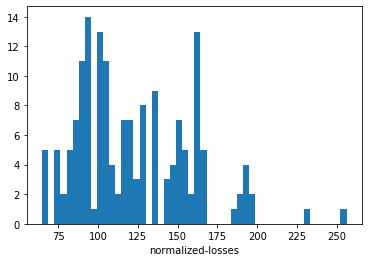

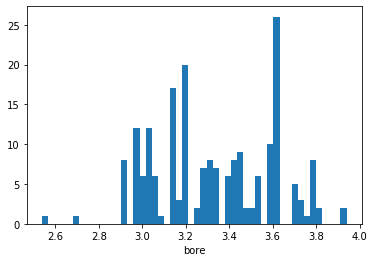

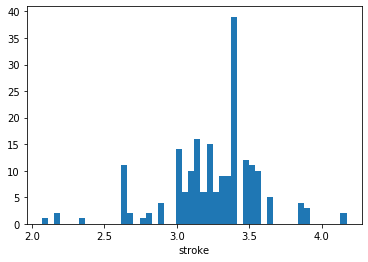

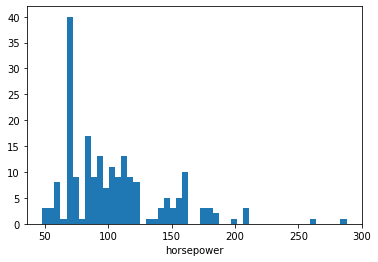

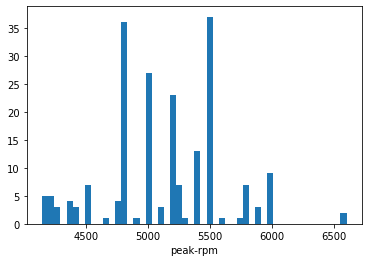

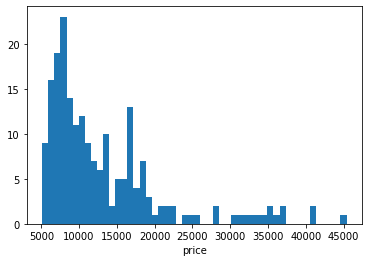

In [88]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

**Заполнение пропусков в столбце "normalized-losses"**

In [89]:
# Фильтр по пустым значениям поля normalized-losses 
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [90]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['normalized-losses'].isnull()].index
flt_index

Int64Index([  0,   1,   2,   5,   7,   9,  14,  15,  16,  17,  43,  44,  45,
             46,  48,  49,  63,  66,  71,  73,  74,  75,  82,  83,  84, 109,
            110, 113, 114, 124, 126, 127, 128, 129, 130, 131, 181, 189, 191,
            192, 193],
           dtype='int64')

In [158]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['normalized-losses']

0     NaN
1     NaN
2     NaN
5     NaN
7     NaN
9     NaN
14    NaN
15    NaN
16    NaN
17    NaN
43    NaN
44    NaN
45    NaN
46    NaN
48    NaN
49    NaN
63    NaN
66    NaN
71    NaN
73    NaN
74    NaN
75    NaN
82    NaN
83    NaN
84    NaN
109   NaN
110   NaN
113   NaN
114   NaN
124   NaN
126   NaN
127   NaN
128   NaN
129   NaN
130   NaN
131   NaN
181   NaN
189   NaN
191   NaN
192   NaN
193   NaN
Name: normalized-losses, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [93]:
data_num_norm_loss = data_num[['normalized-losses']]
data_num_norm_loss

,normalized-losses
0,NaN
1,NaN
2,NaN
3,164.0
4,164.0
...,...
200,95.0
201,95.0
202,95.0
203,95.0


In [94]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_norm_loss)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

С помощью класса SimpleImputer проведем импьютацию с различными показателями центра распределения ("среднее", "медиана", "самое частое")

In [95]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_norm_loss)
    return data_num_imp[mask_missing_values_only]

In [96]:
# центр распределения - "среднее"
"mean", test_num_impute("mean")

('mean',
 array([122., 122., 122., 122., 122., 122., 122., 122., 122., 122., 122.,
        122., 122., 122., 122., 122., 122., 122., 122., 122., 122., 122.,
        122., 122., 122., 122., 122., 122., 122., 122., 122., 122., 122.,
        122., 122., 122., 122., 122., 122., 122., 122.]))

In [97]:
# центр распределения - "медина"
"median", test_num_impute("median")

('median',
 array([115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115.]))

In [98]:
# центр распределения - "самое частое"
"most_frequent", test_num_impute("most_frequent")

('most_frequent',
 array([161., 161., 161., 161., 161., 161., 161., 161., 161., 161., 161.,
        161., 161., 161., 161., 161., 161., 161., 161., 161., 161., 161.,
        161., 161., 161., 161., 161., 161., 161., 161., 161., 161., 161.,
        161., 161., 161., 161., 161., 161., 161., 161.]))

In [99]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy = strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [100]:
# центр распределения - "среднее"
test_num_impute_col(data, 'normalized-losses', "mean")

('normalized-losses', 'mean', 41, 122.0, 122.0)

In [101]:
# центр распределения - "медиана"
test_num_impute_col(data, 'normalized-losses', "median")

('normalized-losses', 'median', 41, 115.0, 115.0)

In [102]:
# центр распределения - "самое частое"
test_num_impute_col(data, 'normalized-losses', "most_frequent")

('normalized-losses', 'most_frequent', 41, 161.0, 161.0)

Таким образом можно избавиться от пропусков во всех колонках, но это происходит весьма неосознанно

**Осознанное заполнение пропусков**

Из описания набора данных известно, что значат все признаки. Учитывая их взаимосвязь между собой, можно попробовать приблизительно посчитать возможные значения пропущенных данных.

Попробуем это сделать на примере колонки с наибольшим количеством пропусков normalized-losses. Вернуться к описанию данных

Раз этот показатель вычисляется среди автомобилей определнной классификации, то мы можем попробовать заменить пропуски данных в этой колонке средним значением этого показателя машин одного класса. Выберем в качестве классификации тип кузова.

Например, если машина с пропущенной normalized-value имеет тип кузова sedan, то посчитаем среднее для всех sedan и вставим в пропуск.

Алгоритм написан таким образом, что работает с tuples для итерации по циклу. Из-за технических особенностей кортежей потребуется сначала немного переименовать колонки: везде поменять "-" на "_".

In [103]:
data.columns = data.columns.str.replace('-', '_')

In [104]:
test_data = data.copy()
for row in test_data.itertuples():
     if np.isnan(row.normalized_losses):
            body_style_data = test_data.loc[test_data['body_style'] == row.body_style]
            test_data.at[row.Index, 'normalized_losses'] = body_style_data['normalized_losses'].mean()
test_data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

Таким образом, мы убрали все пропуски в "normalized_losses"

Сделаем значения еще немного точнее

Будем считать "normalized-losses" не просто для машин с одним кузовом, но только для тех, у кого кол-во лошадиных сил приблизительно совпадает с этим кол-вом у машины с пропуском данных.

Для этого сначала уберем пропуски в колонке horsepower. Обычно чем больше двигатель, тем больше л.с. он имеет. Поэтому будем искать дргуие автомобили с хотя бы похожим размером двигателя engine_size.

In [105]:
# Стандартное отклонение размеров двигателя
data[['engine_size']].std()

engine_size    41.642693
dtype: float64

In [106]:
for row in data.itertuples():
     if np.isnan(row.horsepower):
            #Возьмём разборс размеров двигателей, равным половине от стандратного отклонения
            engine_size_data = data.loc[((row.engine_size - 20) < data['engine_size']) & (data['engine_size'] < (row.engine_size + 20))]
            data.at[row.Index, 'horsepower'] = engine_size_data['horsepower'].mean()
data['horsepower'].isnull().sum()

0

Теперь усложним наш алгоритм подсчета "normalized-losses". 
Будем среди машин с одинаковым кузовом искать те, у которых отличается кол-во л.с. максимум на 30 единиц.

Методом проб и ошибок выяснилось, что могут попадаться машины, кол-во л.с. которых будет сильно отличаться от машин того же кузова. Для таких машин будем вести подсчет только среди машин с тем же кузовом, без учета кол-ва л.с.

In [107]:
for row in data.itertuples():
     if np.isnan(row.normalized_losses):
            body_style_data = data.loc[data['body_style']== row.body_style]
            hp_and_body_data = body_style_data.loc[((row.horsepower - 30) < data['horsepower']) & (data['horsepower'] < (row.horsepower + 30))]
            if hp_and_body_data.shape[0] <= 1:
                data.at[row.Index, 'normalized_losses'] = body_style_data['normalized_losses'].mean()
            else:
                data.at[row.Index, 'normalized_losses'] = hp_and_body_data['normalized_losses'].mean()
            # Если и это не помогло, то просто считаем среднее по колонке:
            if np.isnan(data.at[row.Index, 'normalized_losses']):
                data.at[row.Index, 'normalized_losses'] = data['normalized_losses'].mean()
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           0
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

Мы полностью устранили ошибки в колонке "normalized_losses"

**Заполнение пропусков в столбце "bore"**

bore - диаметр цилиндра. Этот параметр, вероятнее всего, зависит от размера двигателя. Используем этот факт для более точного заполнения пропусков.

In [108]:
for row in data.itertuples():
     if np.isnan(row.bore):
            #Возьмём разборс размеров двигателей, равным половине от стандратного отклонения
            engine_size_data = data.loc[((row.engine_size - 20) < data['engine_size']) & (data['engine_size'] < (row.engine_size + 20))]
            data.at[row.Index, 'bore'] = engine_size_data['bore'].mean()
print('Кол-во пропусков в bore:', data['bore'].isnull().sum())

Кол-во пропусков в bore: 0


**Заполнение пропусков в столбце "stroke"**

stroke - ход поршня. Этот параметры также, как и параметр "bore"? скорее всего, зависит от размера двигателя. Используем этот факт для более точного заполнения пропусков.

In [ ]:
for row in data.itertuples():
     if np.isnan(row.stroke):
            engine_size_data = data.loc[((row.engine_size - 20) < data['engine_size']) & (data['engine_size'] < (row.engine_size + 20))]
            data.at[row.Index, 'stroke'] = engine_size_data['stroke'].mean()
print('Кол-во пропусков в stroke:', data['stroke'].isnull().sum())

**Заполнение пропусков в столбце "peak_rpm"**

peak-rpm - макс. число оборотов двигателя в минуту. Скорее всего зависит от кол-ва лошадиных сил в двигателе.

In [110]:
for row in data.itertuples():
     if np.isnan(row.peak_rpm):
            #Возьмём разборс размеров двигателей, равным половине от стандратного отклонения
            hp_data = data.loc[((row.horsepower - 30) < data['horsepower']) & (data['horsepower'] < (row.horsepower + 30))]
            data.at[row.Index, 'peak_rpm'] = engine_size_data['peak_rpm'].mean()
print('Кол-во пропусков в peak_rpm:', data['peak_rpm'].isnull().sum())

Кол-во пропусков в peak_rpm: 0


**Заполнение пропусков в столбце "price"**

price - Цена автомобиля. Для заполнения пропусков в этом параметре примением тот же метод, что и для заполнения normalized-value, потому что этот параметр зависит как от кузова, так ии от мощности двигателя

In [111]:
for row in data.itertuples():
     if np.isnan(row.price):
            body_style_data = data.loc[data['body_style']== row.body_style]
            hp_and_body_data = body_style_data.loc[((row.horsepower - 30) < data['horsepower']) & (data['horsepower'] < (row.horsepower + 30))]
            if hp_and_body_data.shape[0] <= 1:
                data.at[row.Index, 'price'] = body_style_data['price'].mean()
            else:
                data.at[row.Index, 'price'] = hp_and_body_data['price'].mean()
            # Если и это не помогло, то просто считаем среднее по колонке:
            if np.isnan(data.at[row.Index, 'price']):
                data.at[row.Index, 'price'] = data['price'].mean()
print('Кол-во пропусков в price:', data['price'].isnull().sum())

Кол-во пропусков в price: 0


In [112]:
# Все пропуски в числовых данных убраны
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### 1.2.2. Обработка пропусков в категориальных данных

**Заполнение пропусков в столбце "num_of_doors"**

Теперь очередь разобраться с категориальным признаком "num_of_doors"

In [113]:
# Выберем даннее только из этой колонки
doors_data = data[['num_of_doors']]
doors_data.head()

,num_of_doors
0,two
1,two
2,two
3,four
4,four


In [114]:
# Все возможнве комплектации дверей (все уникальные значения колонки)
doors_data['num_of_doors'].unique()

array(['two', 'four', nan], dtype=object)

In [115]:
# Размер колонки
doors_data[doors_data['num_of_doors'].isnull()].shape

(2, 1)

In [116]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(doors_data)
data_imp

array([['two'],
       ['two'],
       ['two'],
       ['four'],
       ['four'],
       ['two'],
       ['four'],
       ['four'],
       ['four'],
       ['two'],
       ['two'],
       ['four'],
       ['two'],
       ['four'],
       ['four'],
       ['four'],
       ['two'],
       ['four'],
       ['two'],
       ['two'],
       ['four'],
       ['two'],
       ['two'],
       ['two'],
       ['four'],
       ['four'],
       ['four'],
       ['four'],
       ['four'],
       ['two'],
       ['two'],
       ['two'],
       ['two'],
       ['two'],
       ['two'],
       ['four'],
       ['four'],
       ['two'],
       ['two'],
       ['four'],
       ['four'],
       ['four'],
       ['two'],
       ['four'],
       ['two'],
       ['four'],
       ['two'],
       ['four'],
       ['four'],
       ['two'],
       ['two'],
       ['two'],
       ['two'],
       ['four'],
       ['four'],
       ['two'],
       ['two'],
       ['two'],
       ['two'],
       ['two'],
       ['four

In [117]:
# Пустые значения отсутствуют
np.unique(data_imp)

array(['four', 'two'], dtype=object)

Таким образом, мы избавились от пропусков в категориальных данных.

## 2. Преобразование категориальных признаков в числовые

Преобразуем параметр "num_of_doors" в числовые значения

In [119]:
doors2_data = pd.DataFrame({'doors':data_imp.T[0]})
doors2_data

,doors
0,two
1,two
2,two
3,four
4,four
...,...
200,four
201,four
202,four
203,four


Для преобразования данных в числовые будем использовать LabelEncoder

In [120]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [121]:
le = LabelEncoder()
doors2_data_le = le.fit_transform(doors2_data['doors'])

In [122]:
doors2_data['doors'].unique()

array(['two', 'four'], dtype=object)

За каждой комплектацией теперь закреплен номер

In [123]:
np.unique(doors2_data_le)

array([0, 1])

Стоит учитывать, что перед кодированием признаки сортируются в алфавитном порядке. Номера выдаются по алфавиту

In [124]:
le.inverse_transform([0, 1])

array(['four', 'two'], dtype=object)

## 2.2. Кодирование категорий наборами бинарных значений - one-hot encoding

In [125]:
ohe = OneHotEncoder()
doors2_data_ohe = ohe.fit_transform(doors2_data[['doors']])

In [127]:
# Исходный размер данных. Просто колонка.
doors2_data.shape

(205, 1)

Каждое уникальное значение было закодировано набором из 2 единиц и нулей

In [128]:
doors2_data_ohe.shape

(205, 2)

In [129]:
doors2_data_ohe

<205x2 sparse matrix of type '<class 'numpy.float64'>'
	with 205 stored elements in Compressed Sparse Row format>

Пример данных, хранящихся в матрице

In [131]:
doors2_data_ohe.todense()[104:109]

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.]])

Эти же данные в исходной колонке

In [133]:
doors2_data[104:109]

,doors
104,two
105,two
106,two
107,four
108,four


**Использование Pandas get_dummies - быстрого варианта one-hot кодирования**

In [134]:
pd.get_dummies(doors2_data)[104:109]

,doors_four,doors_two
104,0,1
105,0,1
106,0,1
107,1,0
108,1,0


In [139]:

pd.get_dummies(doors_data, dummy_na=True)[100:110]

,num_of_doors_four,num_of_doors_two,num_of_doors_nan
100,1,0,0
101,1,0,0
102,1,0,0
103,1,0,0
104,0,1,0
105,0,1,0
106,0,1,0
107,1,0,0
108,1,0,0
109,1,0,0


## 3. Масштабирование данных

Для преобразования данных в числовые будем использовать MinMaxScaler, StandardScaler, Normalizer

In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

Применим масштабирование данных на колонке "Price" используемого набора данных

In [144]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['price']])

### 3.1. MinMax Масштабирование

**До масштабирования:**

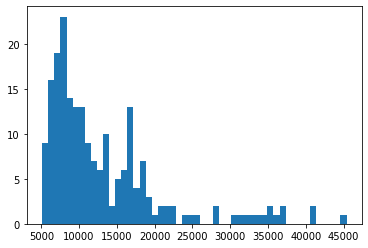

In [146]:
plt.hist(data['price'], 50)
plt.show()

**После масштабирования:**

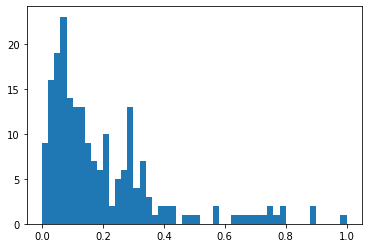

In [147]:
plt.hist(sc1_data, 50)
plt.show()

### 3.2. Масштабирование данных на основе Z-оценки - StandardScaler

In [148]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['price']])

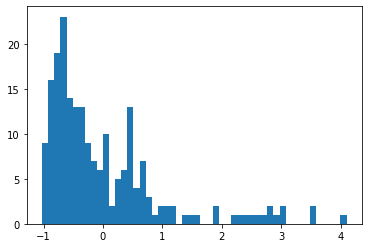

In [155]:
plt.hist(sc2_data, 50)
plt.show()

### 3.3. Нормализация данных

In [150]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['price']])

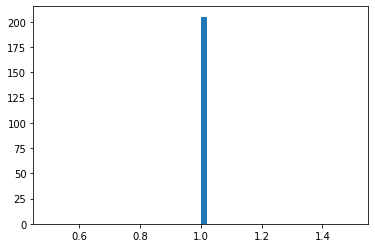

In [156]:
plt.hist(sc3_data, 50)
plt.show()